In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import warnings
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns



import cv2
from PIL import Image

import tensorflow as tf
from keras import layers
from tensorflow.keras import applications 
from keras.applications import MobileNetV2
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras import models
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix

from tqdm import tqdm

from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import Dropout, GaussianNoise, GaussianDropout,GlobalAveragePooling2D
from keras.layers import Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, SeparableConv2D
from keras.constraints import maxnorm
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


from keras import backend as K
from keras import regularizers, optimizers

from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import Adam, SGD
import keras

import cv2
import time
import scipy as sp
import numpy as np
import random as rn
import pandas as pd
from tqdm import tqdm
from PIL import Image
from functools import partial
import matplotlib.pyplot as plt

# Machine Learning
import tensorflow as tf
import keras
from keras import initializers
from keras import regularizers
from keras import constraints
from keras import backend as K
from keras.activations import elu
from keras.optimizers import Adam
from keras.models import Sequential
from keras.engine import Layer, InputSpec
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import cohen_kappa_score

In [4]:
balanced_train = '../input/balanced-aug-dataset/balanced_aug_dataset2.csv'
test_path = '../input/balanced-aug-dataset/test_df2.csv'
valid_path = '../input/balanced-aug-dataset/val_df2.csv'

TRAIN_IMAGE_DIR = '../input/balanced-aug-dataset'
TEST_IMAGE_DIR = '../input/aptos2019-blindness-detection/train_images/'
VALID_IMAGE_DIR = '../input/min-class1/valid_diag/'

HEIGHT, WIDTH = 224, 224
RANDOM_STATE = 974
VERBOSE = True
BATCH_SIZE = 16
IMG_SIZE = 224

warnings.filterwarnings('ignore')

In [ ]:
#you could read the cleaned version of the dataset ../input/balanced-aug-dataset/APTOS_df_train.csv , no need to run the EDA section

In [5]:
#read data
#df_train = pd.read_csv(balanced_train)
test_df = pd.read_csv(test_path)
valid_df = pd.read_csv(valid_path)

In [ ]:
df_train2 

In [ ]:
i=0
for row in range(len(test_df)):
    if test_df.id_code[i]:
        

In [6]:
df_train = pd.read_csv('../input/balanced-aug-dataset/APTOS_df_train.csv')

In [7]:
df_train.head(10)

,id_code,diagnosis,data_augm
0,1541226c5d72,2,../input/balanced-aug-dataset/diag_2/diag_2/15...
1,2/diag_3/7b49041cbf17_0_1033,3,../input/balanced-aug-dataset/diag_3/diag_3/7b...
2,9c7b83caf81_0_2999,2,../input/balanced-aug-dataset/diag_2/diag_2/a9...
3,2/diag_3/d0ffa0425ef1_0_3415,3,../input/balanced-aug-dataset/diag_3/diag_3/d0...
4,ea588d1e5d96_0_9315,2,../input/balanced-aug-dataset/diag_2/diag_2/ea...
5,9a1029536d78,0,../input/balanced-aug-dataset/diag_0/diag_0/9a...
6,2/diag_3/269b44e628eb_0_615,3,../input/balanced-aug-dataset/diag_3/diag_3/26...
7,2/diag_4/6c3745a222da_0_407,4,../input/balanced-aug-dataset/diag_4/diag_4/6c...
8,2/diag_3/a80dab8eddf4_0_1697,3,../input/balanced-aug-dataset/diag_3/diag_3/a8...
9,fa9bece586fc,0,../input/balanced-aug-dataset/diag_0/diag_0/fa...


In [8]:
df_train.dtypes

id_code      object
diagnosis     int64
data_augm    object
dtype: object

In [9]:
df_train.shape

(6158, 3)

# EDA

In [ ]:
df_train.head(10)

In [ ]:
df_train.shape

In [ ]:
df_train.dtypes

In [10]:
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
df_train['id_code'] = df_train['id_code'].astype(str)
df_train['data_augm'] = df_train['data_augm'].astype(str)

In [11]:
df_train['diagnosis'].value_counts()

3    1235
4    1233
1    1231
2    1230
0    1229
Name: diagnosis, dtype: int64

In [12]:
test_df.head(10)

,id_code,diagnosis
0,83b61051737f.png,2
1,d26bb2ed6e71.png,0
2,bcc762618e7d.png,2
3,a06e41bd2634.png,2
4,4205e9deb058.png,0
5,52886bed8a07.png,2
6,02cd34a85b24.png,0
7,500aad15b7c8.png,0
8,b6d9974443ce.png,0
9,5879285f9d8d.png,1


In [13]:
test_df['diagnosis'] = test_df['diagnosis'].astype(str)
test_df['id_code'] = test_df['id_code'].astype(str)

In [14]:
#display validation set images from training dataset
def display_samples2(df, columns=5, rows=4):
    fig=plt.figure(figsize=(3*columns, 2*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'../input/aptos2019-blindness-detection/train_images/{image_path}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()
#disply sample of the images titled with the labe case

In [15]:
test_df.shape

(440, 2)

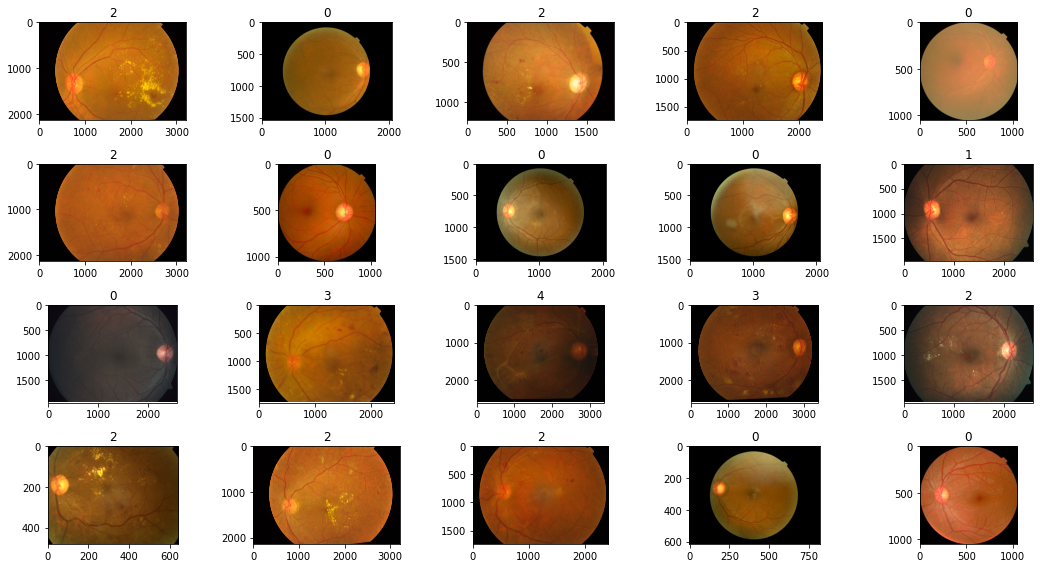

In [16]:
display_samples2(test_df)

In [17]:
valid_df.head(10)

,id_code,diagnosis
0,5b2648ad455e.png,0
1,8be6629a6039.png,0
2,9bbb6c455913.png,0
3,2da82d14e1b7.png,0
4,95e732e043a1.png,4
5,bf7b4eae7ad0.png,0
6,ee77763a6afb.png,0
7,c01eae4b4939.png,4
8,7d261f986bef.png,2
9,50915e2329a1.png,0


In [19]:
valid_df.shape

(733, 2)

In [20]:
valid_df['diagnosis'] = valid_df['diagnosis'].astype(str)
valid_df['id_code'] = valid_df['id_code'].astype(str)

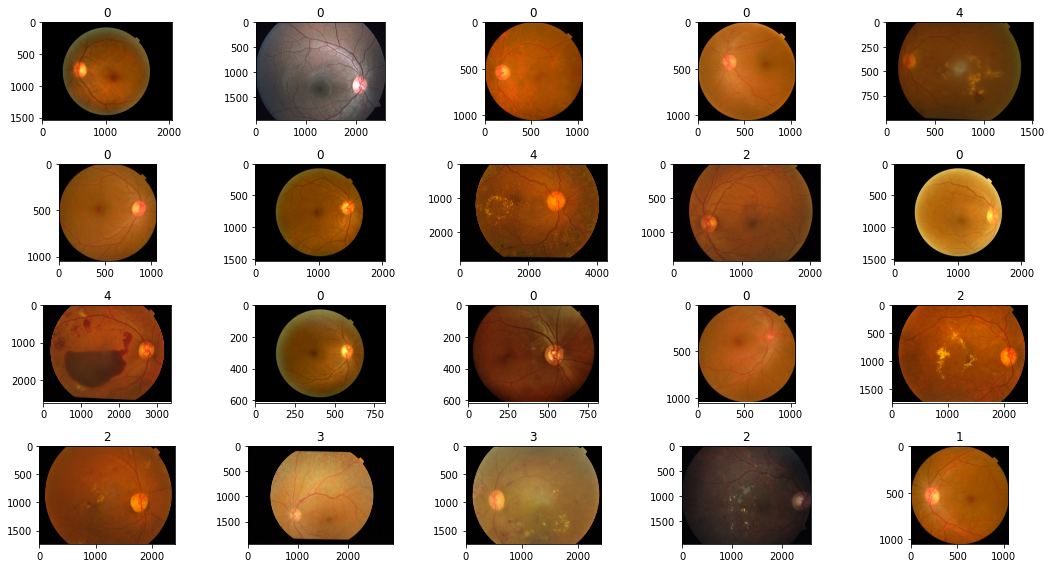

In [21]:
#display images from validation dataset
display_samples2(valid_df)

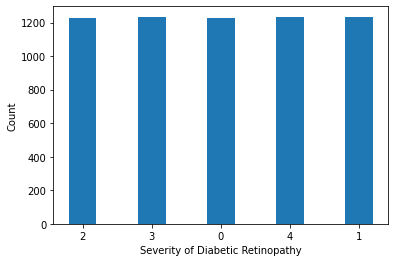

(6158, 3)


In [22]:
#balanced dataset
if VERBOSE:
    plt.hist(df_train.diagnosis, bins=[-0.2, 0.2, 0.8, 1.2, 1.8, 2.2, 2.8, 3.2, 3.8, 4.2])
    plt.xlabel("Severity of Diabetic Retinopathy")
    plt.ylabel("Count")
    plt.show()
    print(df_train.shape)

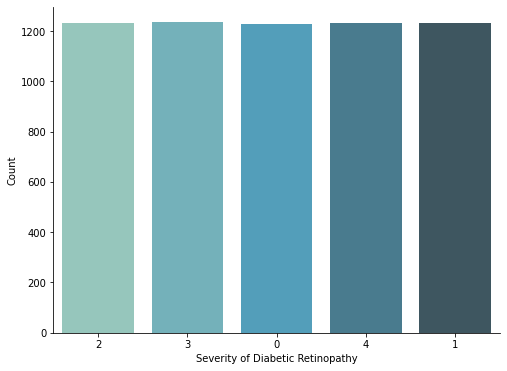

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="diagnosis", data=df_train, palette="GnBu_d")
sns.despine()
plt.xlabel("Severity of Diabetic Retinopathy")
plt.ylabel("Count")
plt.show()

In [ ]:
#Create an id column after random splitting
'''rows = []
for i in range(len(new_dataset)):
    rows.append(i)
    i+=1
#print(rows)

idd = pd.Series(rows)
new_dataset['idd'] = idd.values
new_dataset.set_index('idd', inplace=True)
new_dataset.head(10)'''

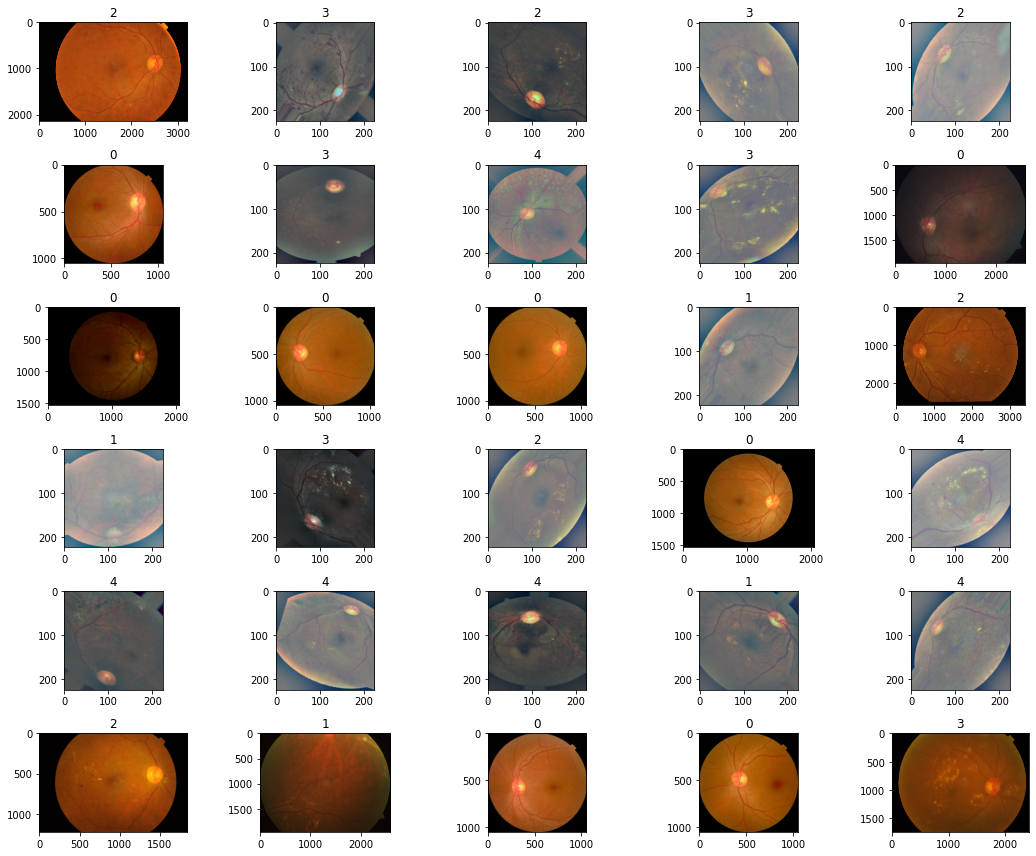

In [26]:
#display images from training dataset
def display_samples(df, columns=5, rows=6):
    fig = plt.figure(figsize=(3*columns, 2*rows))
    for i in range(columns*rows):
        image_path = df.data_augm[i]
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
        i+=1
    
    plt.tight_layout()
#disply sample of the images titled by the labe case
display_samples(df_train)

In [ ]:
#df_train.to_csv('df_train.csv', index=False)

In [ ]:
#os.path.exists(df_train.data_augm[15])

# Model training and validation

In [27]:
from keras.preprocessing import image 
data_generator = image.ImageDataGenerator(rescale=1./255)
validation_generator = image.ImageDataGenerator(rescale=1./255)
test_generator = image.ImageDataGenerator(rescale=1./255)

In [28]:
import keras
from keras.preprocessing import image
train_gen = data_generator.flow_from_directory(
    #dataframe = df_aptos2,
    directory = '../input/balanced-aug-dataset/',
    class_mode = 'categorical',
    #x_col = 'id_code',
    #y_col = 'diagnosis',
    target_size = (IMG_SIZE,IMG_SIZE),
    #subset = 'training',
    #directory = TRAIN_IMAGE_DIR,
    batch_size = 16,
    shuffle = True
)

val_gen = validation_generator.flow_from_directory(
    #dataframe = valid_df,
    class_mode = 'categorical',
    #x_col = 'id_code',
    #y_col = 'diagnosis',
    target_size = (IMG_SIZE,IMG_SIZE),
    #subset = 'validation',
    directory = '../input/min-class1/valid_diag/' ,
    batch_size = 16,
    shuffle = True
    
)
TRAIN_IMAGE_DIR = '../input/aptos2019-blindness-detection/train_images'
test_gen = test_generator.flow_from_dataframe(
    dataframe = test_df,
    class_mode = 'categorical',
    x_col = 'id_code',
    y_col = 'diagnosis',
    target_size = (IMG_SIZE,IMG_SIZE),
    directory = TRAIN_IMAGE_DIR,
    batch_size = BATCH_SIZE,
    shuffle = False
)


Found 6158 images belonging to 5 classes.
Found 733 images belonging to 5 classes.
Found 440 validated image filenames belonging to 5 classes.


In [29]:
def get_preds_and_labels(model, generator):
    """
    Get predictions and labels from the generator
    
    :param model: A Keras model object
    :param generator: A Keras ImageDataGenerator object
    
    :return: A tuple with two Numpy Arrays. One containing the predictions
    and one containing the labels
    """
    preds = []
    labels = []
    for _ in range(int(np.ceil(generator.samples / BATCH_SIZE))):
        x, y = next(generator)
        preds.append(model.predict(x))
        labels.append(y)
    # Flatten list of numpy arrays
    return np.concatenate(preds).ravel(), np.concatenate(labels).ravel()

In [30]:
class Metrics(Callback):
    """
    A custom Keras callback for saving the best model
    according to the Quadratic Weighted Kappa (QWK) metric
    """
    def on_train_begin(self, logs={}):
        """
        Initialize list of QWK scores on validation data
        """
        self.val_kappas = []

    def on_epoch_end(self, epoch, logs={}):
        """
        Gets QWK score on the validation data
        
        :param epoch: The current epoch number
        """
        # Get predictions and convert to integers
        y_pred, labels = get_preds_and_labels(model, val_gen)
        y_pred = np.rint(y_pred).astype(np.uint8).clip(0, 4)
        # We can use sklearns implementation of QWK straight out of the box
        # as long as we specify weights as 'quadratic'
        _val_kappa = cohen_kappa_score(labels, y_pred, weights='quadratic')
        self.val_kappas.append(_val_kappa)
        print(f"val_kappa: {round(_val_kappa, 4)}")
        if _val_kappa == max(self.val_kappas):
            print("Validation Kappa has improved. Saving model.")
            self.model.save(SAVED_MODEL_NAME)
        return

# IncpetionV3

In [31]:
SAVED_MODEL_NAME = 'IC.h5'

In [32]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import Adam, SGD
import keras
from keras.layers import Activation
inet = InceptionV3(include_top = False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential()
model.add(inet)
model.add(Conv2D(filters = 1024, kernel_size = (2,2),padding = 'same'))
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(5, activation='softmax'))



opt=keras.optimizers.Adagrad(
    learning_rate=0.01,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad")
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

In [ ]:
model.summary()

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop= EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 20)
# model_checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

In [ ]:
kappa_metrics = Metrics()
# Monitor MSE to avoid overfitting and save best model
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=12)
rlr = ReduceLROnPlateau(monitor='val_loss', 
                        factor=0.5, 
                        patience=4, 
                        verbose=1, 
                        mode='auto', 
                        epsilon=0.0001)

# Begin training
history = model.fit_generator(train_gen,
                    steps_per_epoch=11,
                    epochs=30,
                    validation_data=val_gen,
                    validation_steps = 5,
                    callbacks=[rlr]) #kappa_metrics,

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
# classification report of test set

preds = []
labels = []
for _ in range(int(np.ceil(test_gen.samples / BATCH_SIZE))):
    x, y = next(test_gen)
    preds.extend(model.predict_classes(x))
    yy = np.argmax(y, axis = 1)
    labels.extend(yy)
    
cm = confusion_matrix(preds, labels)   
sns.heatmap(cm, annot=True,fmt=".1f",annot_kws={"size": 10},cmap='Blues')
print(classification_report(labels, preds))

In [ ]:
# classification report of val set
preds = []
labels = []
for _ in range(int(np.ceil(val_gen.samples / BATCH_SIZE))):
    x, y = next(val_gen)
    preds.extend(model.predict_classes(x))
    yy = np.argmax(y, axis = 1)
    labels.extend(yy)
cm = confusion_matrix(preds, labels)
sns.heatmap(cm, annot=True,fmt=".1f",annot_kws={"size": 10},cmap='Blues')
print(classification_report(labels, preds))

In [ ]:
# classification report of train set
preds = []
labels = []
for _ in range(int(np.ceil(train_gen.samples / BATCH_SIZE))):
    x, y = next(train_gen)
    preds.extend(model.predict_classes(x))
    yy = np.argmax(y, axis = 1)
    labels.extend(yy)
cm = confusion_matrix(preds, labels)
sns.heatmap(cm, annot=True,fmt=".1f",annot_kws={"size": 10},cmap='Blues')
print(classification_report(labels, preds))

In [ ]:
print(history.history.keys())
accu = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

plt.plot(accu, label="Accuracy")
plt.plot(val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Acc', 'val_acc'])
plt.plot(np.argmax(history.history["val_categorical_accuracy"]), np.max(history.history["val_categorical_accuracy"]), marker="x", color="r",
         label="best model")
plt.show()



plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r",
         label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
# Calculate QWK on train set
y_train_preds, train_labels = get_preds_and_labels(model, train_gen)
y_train_preds = np.rint(y_train_preds).astype(np.uint8).clip(0, 4)

# Calculate score
train_score = cohen_kappa_score(train_labels, y_train_preds, weights="quadratic")

# Calculate QWK on validation set
y_val_preds, val_labels = get_preds_and_labels(model, val_gen)
y_val_preds = np.rint(y_val_preds).astype(np.uint8).clip(0, 4)

# Calculate score
val_score = cohen_kappa_score(val_labels, y_val_preds, weights="quadratic")

In [ ]:
# Calculate QWK on test set
y_test_preds, test_labels = get_preds_and_labels(model, test_gen)
y_test_preds = np.rint(y_test_preds).astype(np.uint8).clip(0, 4)

# Calculate score
test_score = cohen_kappa_score(test_labels, y_test_preds, weights="quadratic")

In [ ]:
print(f"The Training Cohen Kappa Score is: {round(train_score, 5)}")
print(f"The Validation Cohen Kappa Score is: {round(val_score, 5)}")
print(f"The Test Cohen Kappa Score is: {round(test_score, 5)}")

# prediction

In [ ]:
CHANNEL_SIZE = 3 #Size of channel
IMAGE_SIZE = 224
BATCH_SIZE = 16
IMG_SIZE = 224
NUM_EPOCHS19 = 50 #No of epochs for training 2019 Dataset
BATCH_SIZE = 16 # Batach size for training images.
IMG_DIM = 300 # Image size
NUM_CLASSES =5 # No of classes
from keras.preprocessing.image import ImageDataGenerator
test_datagen=ImageDataGenerator(rescale=1./255)
SEED = 1234
APTOS19_KAGGLE_DIR_TEST = '../input/aptos2019-blindness-detection/test_images'
TEST19_DF_PATH = '../input/aptos2019-blindness-detection/test.csv'
df_test_folder = pd.read_csv(TEST19_DF_PATH)
df_test_folder['id_code'] = df_test_folder['id_code'].astype(str)+'.png'
test_generator=test_datagen.flow_from_dataframe(dataframe=df_test_folder,
                                                directory = APTOS19_KAGGLE_DIR_TEST,
                                                x_col="id_code",
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                batch_size=1,
                                                shuffle=False, 
                                                class_mode=None, 
                                                seed=SEED)

In [ ]:
from tqdm import tqdm
from math import ceil
tta_steps = 10
preds_tta=[]
for i in tqdm(range(tta_steps)):
    test_generator.reset()
    preds = model.predict_generator(generator=test_generator,steps =ceil(df_test_folder.shape[0]))
    preds_tta.append(preds)

In [ ]:
final_pred = np.mean(preds_tta, axis=0)
predicted_class_indices = np.argmax(final_pred, axis=1)
len(predicted_class_indices)    

In [ ]:
results=pd.DataFrame({"id_code":test_generator.filenames, "diagnosis":predicted_class_indices})  
results.id_code=results.id_code.apply(lambda x: x[:-4])
results.to_csv("submission.csv", index=False)
results.head() 

In [ ]:
# Visualization of predicted test data using graphs
results['diagnosis'].value_counts().plot(kind='bar');
plt.title('Predict Samples Per Class');
plt.xlabel('Class', fontsize=16)
plt.ylabel('Samples', fontsize=16)

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="diagnosis", data=results, palette="GnBu_d")
sns.despine()
plt.show()

In [ ]:
CLASSS={0:"No DR",1:"Mild",2:"Moderate",3:"Severe",4:"Proliferative DR"} 
figure=plt.figure(figsize=(18,18))
for target_class in (results['diagnosis'].unique()):
    #print(CLASSS[target_class],target_class)
    for i, (idx, row ) in enumerate(results.loc[results.diagnosis==target_class].sample(4, random_state=79).iterrows()):
        ax= figure.add_subplot(5,5, target_class*5+i+2)
        imagefile=f"../input/aptos2019-blindness-detection/test_images/{row['id_code']}.png" 
        img=cv2.imread(imagefile)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        ax.set_title(CLASSS[target_class])

# CNN

In [33]:
SAVED_MODEL_NAME_CNN = 'CNN.h5'

In [35]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras import activations

num_classes = df_train.shape[1]
def build_model2():
    # create model
    
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
    model.add(layers.Activation(activations.relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(layers.Activation(activations.relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(layers.Activation(activations.relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(layers.Activation(activations.relu))
    model.add(Dropout(0.2))
    model.add(Dense(5))
    model.add(layers.Activation(activations.softmax))
    
     # Compile model
    opt=keras.optimizers.Adagrad(
    learning_rate=0.01,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad")

    model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['categorical_accuracy'])
    return model

In [36]:
model2 = build_model2()

In [37]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9

In [38]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop= EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 20)
# model_checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

In [39]:
kappa_metrics = Metrics()
# Monitor MSE to avoid overfitting and save best model
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=12)

rlr = ReduceLROnPlateau(monitor='val_loss', 
                        factor=0.5, 
                        patience=4, 
                        verbose=1, 
                        mode='auto', 
                        epsilon=0.0001)

# Begin training
history = model2.fit_generator(train_gen,
                    steps_per_epoch=11,
                    epochs=30,
                    validation_data=val_gen,
                    validation_steps = 5,
                    callbacks=[rlr]) #kappa_metrics,

Epoch 1/30
11/11 [==============================] - 37s 3s/step - loss: 1.5893 - categorical_accuracy: 0.2485 - val_loss: 1.3500 - val_categorical_accuracy: 0.5000
Epoch 2/30
11/11 [==============================] - 31s 3s/step - loss: 1.5097 - categorical_accuracy: 0.2306 - val_loss: 1.3923 - val_categorical_accuracy: 0.4250
Epoch 3/30
11/11 [==============================] - 31s 3s/step - loss: 1.5377 - categorical_accuracy: 0.2428 - val_loss: 1.2733 - val_categorical_accuracy: 0.4625
Epoch 4/30
11/11 [==============================] - 27s 3s/step - loss: 1.4595 - categorical_accuracy: 0.3120 - val_loss: 1.5264 - val_categorical_accuracy: 0.3625
Epoch 5/30
11/11 [==============================] - 29s 3s/step - loss: 1.4885 - categorical_accuracy: 0.3414 - val_loss: 1.2723 - val_categorical_accuracy: 0.5375
Epoch 6/30
11/11 [==============================] - 29s 3s/step - loss: 1.3898 - categorical_accuracy: 0.3552 - val_loss: 1.2899 - val_categorical_accuracy: 0.4625
Epoch 7/30
11/11

In [41]:
import seaborn as sns
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       217
           1       0.45      0.33      0.38        43
           2       0.55      0.80      0.65       124
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        31

    accuracy                           0.68       440
   macro avg       0.37      0.40      0.38       440
weighted avg       0.61      0.68      0.64       440



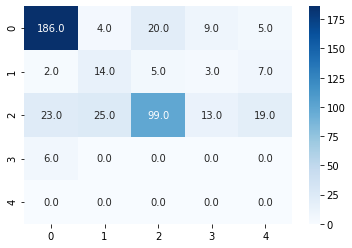

In [43]:
# classification report of test set

preds = []
labels = []
for _ in range(int(np.ceil(test_gen.samples / BATCH_SIZE))):
    x, y = next(test_gen)
    preds.extend(model2.predict_classes(x))
    yy = np.argmax(y, axis = 1)
    labels.extend(yy)
    
cm = confusion_matrix(preds, labels)   
sns.heatmap(cm, annot=True,fmt=".1f",annot_kws={"size": 10},cmap='Blues')
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       357
           1       0.29      0.23      0.25        62
           2       0.51      0.71      0.60       207
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        69

    accuracy                           0.65       733
   macro avg       0.33      0.37      0.34       733
weighted avg       0.57      0.65      0.61       733



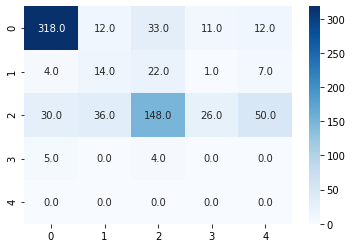

In [45]:
# classification report of val set
preds = []
labels = []
for _ in range(int(np.ceil(val_gen.samples / BATCH_SIZE))):
    x, y = next(val_gen)
    preds.extend(model2.predict_classes(x))
    yy = np.argmax(y, axis = 1)
    labels.extend(yy)
cm = confusion_matrix(preds, labels)
sns.heatmap(cm, annot=True,fmt=".1f",annot_kws={"size": 10},cmap='Blues')
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1229
           1       0.36      0.59      0.45      1231
           2       0.52      0.40      0.45      1230
           3       0.45      0.37      0.41      1235
           4       0.34      0.23      0.27      1233

    accuracy                           0.50      6158
   macro avg       0.50      0.50      0.49      6158
weighted avg       0.50      0.50      0.49      6158



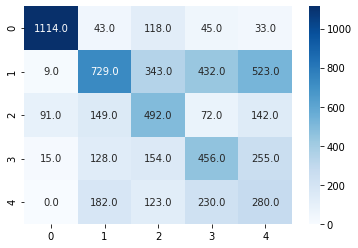

In [46]:
# classification report of train set
preds = []
labels = []
for _ in range(int(np.ceil(train_gen.samples / BATCH_SIZE))):
    x, y = next(train_gen)
    preds.extend(model2.predict_classes(x))
    yy = np.argmax(y, axis = 1)
    labels.extend(yy)
cm = confusion_matrix(preds, labels)
sns.heatmap(cm, annot=True,fmt=".1f",annot_kws={"size": 10},cmap='Blues')
print(classification_report(labels, preds))

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


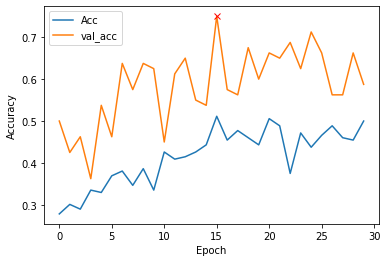

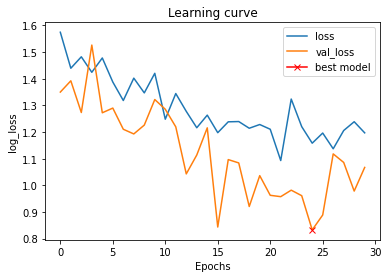

In [52]:
print(history.history.keys())
accu = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

plt.plot(accu, label="Accuracy")
plt.plot(val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Acc', 'val_acc'])
plt.plot(np.argmax(history.history["val_categorical_accuracy"]), np.max(history.history["val_categorical_accuracy"]), marker="x", color="r",
         label="best model")
plt.show()



plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r",
         label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [53]:
# Calculate QWK on train set
y_train_preds, train_labels = get_preds_and_labels(model2, train_gen)
y_train_preds = np.rint(y_train_preds).astype(np.uint8).clip(0, 4)

# Calculate score
train_score = cohen_kappa_score(train_labels, y_train_preds, weights="quadratic")

# Calculate QWK on validation set
y_val_preds, val_labels = get_preds_and_labels(model2, val_gen)
y_val_preds = np.rint(y_val_preds).astype(np.uint8).clip(0, 4)

# Calculate score
val_score = cohen_kappa_score(val_labels, y_val_preds, weights="quadratic")

In [55]:
# Calculate QWK on test set
y_test_preds, test_labels = get_preds_and_labels(model2, test_gen)
y_test_preds = np.rint(y_test_preds).astype(np.uint8).clip(0, 4)

# Calculate score
test_score = cohen_kappa_score(test_labels, y_test_preds, weights="quadratic")

In [56]:
print(f"The Training Cohen Kappa Score is: {round(train_score, 5)}")
print(f"The Validation Cohen Kappa Score is: {round(val_score, 5)}")
print(f"The Test Cohen Kappa Score is: {round(test_score, 5)}")

The Training Cohen Kappa Score is: 0.26781
The Validation Cohen Kappa Score is: 0.53115
The Test Cohen Kappa Score is: 0.5721


# Prediction

In [57]:
CHANNEL_SIZE = 3 #Size of channel
IMAGE_SIZE = 224
BATCH_SIZE = 16
IMG_SIZE = 224
NUM_EPOCHS19 = 50 #No of epochs for training 2019 Dataset
BATCH_SIZE = 16 # Batach size for training images.
IMG_DIM = 300 # Image size
NUM_CLASSES =5 # No of classes
from keras.preprocessing.image import ImageDataGenerator
test_datagen=ImageDataGenerator(rescale=1./255)
SEED = 1234
APTOS19_KAGGLE_DIR_TEST = '../input/aptos2019-blindness-detection/test_images'
TEST19_DF_PATH = '../input/aptos2019-blindness-detection/test.csv'
df_test_folder = pd.read_csv(TEST19_DF_PATH)
df_test_folder['id_code'] = df_test_folder['id_code'].astype(str)+'.png'
test_generator=test_datagen.flow_from_dataframe(dataframe=df_test_folder,
                                                directory = APTOS19_KAGGLE_DIR_TEST,
                                                x_col="id_code",
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                batch_size=1,
                                                shuffle=False, 
                                                class_mode=None, 
                                                seed=SEED)

Found 1928 validated image filenames.


In [59]:
from tqdm import tqdm
from math import ceil
tta_steps = 10
preds_tta=[]
for i in tqdm(range(tta_steps)):
    test_generator.reset()
    preds = model2.predict_generator(generator=test_generator,steps =ceil(df_test_folder.shape[0]))
    preds_tta.append(preds)

100%|██████████| 10/10 [14:52<00:00, 89.23s/it]


In [60]:
final_pred = np.mean(preds_tta, axis=0)
predicted_class_indices = np.argmax(final_pred, axis=1)
len(predicted_class_indices)    

1928

In [61]:
results=pd.DataFrame({"id_code":test_generator.filenames, "diagnosis":predicted_class_indices})  
results.id_code=results.id_code.apply(lambda x: x[:-4])
results.to_csv("submission.csv", index=False)
results.head() 

,id_code,diagnosis
0,0005cfc8afb6,1
1,003f0afdcd15,0
2,006efc72b638,2
3,00836aaacf06,2
4,009245722fa4,2


Text(0, 0.5, 'Samples')

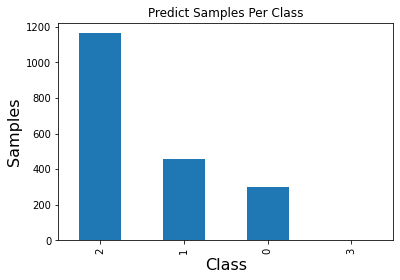

In [62]:
#Visualization of predicted test data using graphs
results['diagnosis'].value_counts().plot(kind='bar');
plt.title('Predict Samples Per Class');
plt.xlabel('Class', fontsize=16)
plt.ylabel('Samples', fontsize=16)

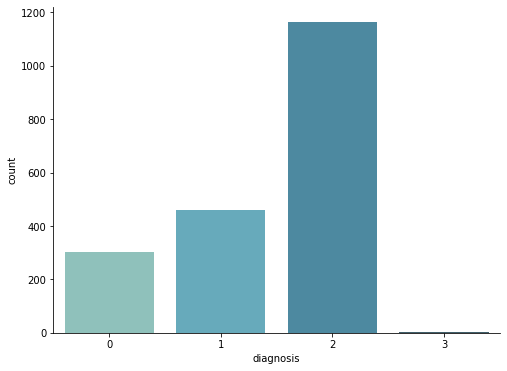

In [63]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="diagnosis", data=results, palette="GnBu_d")
sns.despine()
plt.show()

In [ ]:
CLASSS={0:"No DR",1:"Mild",2:"Moderate",3:"Severe",4:"Proliferative DR"} 
figure=plt.figure(figsize=(18,18))
for target_class in (results['diagnosis'].unique()):
    #print(CLASSS[target_class],target_class)
    for i, (idx, row ) in enumerate(results.loc[results.diagnosis==target_class].sample(4, random_state=79).iterrows()):
        ax= figure.add_subplot(5,5, target_class*5+i+2)
        imagefile=f"../input/aptos2019-blindness-detection/test_images/{row['id_code']}.png" 
        img=cv2.imread(imagefile)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        ax.set_title(CLASSS[target_class])